# This is our coding for second model to predicts the maximum daily price category based on the provided weather data.

##### Let's start with loading some library; 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from scipy.stats import stats

In [2]:
# upload the file
result = pd.read_csv('result.csv')

##### The first step is to look at our DataFrame so we use the code to see all columns. 

In [3]:
# see all columns name
print(result.columns.tolist())

['Date', 'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 'Evaporation (mm)', 'Sunshine (hours)', 'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)', 'Time of maximum wind gust', '9am Temperature (°C)', '9am relative humidity (%)', '9am cloud amount (oktas)', '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', '3pm relative humidity (%)', '3pm cloud amount (oktas)', '3pm wind direction', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)', 'Average temperature (°C)', 'Temperature range (°C)', 'Max_Demand', 'Max_Price_Category']


In [4]:
# here we see some data for all columns
pd.set_option('display.max_columns', None)

In [5]:
result

Date  Minimum temperature (°C)  Maximum temperature (°C)  \
0     1/01/2021                      15.6                      29.9   
1     2/01/2021                      18.4                      29.0   
2     3/01/2021                      17.0                      26.2   
3     4/01/2021                      16.0                      18.6   
4     5/01/2021                      15.9                      19.1   
..          ...                       ...                       ...   
232  26/08/2021                       5.5                      12.9   
233  27/08/2021                       4.6                      13.6   
234  28/08/2021                       5.3                      17.8   
235  29/08/2021                       9.1                      16.2   
236  30/08/2021                       6.4                      17.6   

     Rainfall (mm)  Evaporation (mm)  Sunshine (hours)  \
0              0.0               2.8               9.3   
1              0.0               9.4               1.3   
2             12.6               4.8               7.1   
3              2.6               3.8               0.0   
4             11.2               1.0               0.0   
..             ...               ...               ...   
232            1.2               2.4               1.0   
233            0.0               1.2               3.8   
234            0.0               1.6               9.6   
235            0.6               6.4               4.3   
236            4.0               1.4               7.4   

    Direction of maximum wind gust   Speed of maximum wind gust (km/h)  \
0                               NNE                               31.0   
1                               NNW                               30.0   
2                               WSW                               33.0   
3                               SSE                               41.0   
4                               SSE                               35.0   
..                              ...                                ...   
232                              SE                               31.0   
233                             SSW                               15.0   
234                               N                               39.0   
235                             NNE                               33.0   
236                             NNW                               50.0   

    Time of maximum wind gust  9am Temperature (°C)  \
0                       13:14                  19.2   
1                        8:22                  23.3   
2                       17:55                  18.3   
3                       16:03                  16.2   
4                       11:02                  17.2   
..                        ...                   ...   
232                     12:54                   9.2   
233                     12:18                   7.7   
234                     13:14                   9.1   
235                      1:50                  10.6   
236                     14:04                  11.1   

     9am relative humidity (%)  9am cloud amount (oktas) 9am wind direction  \
0                         77.0                         6                  N   
1                         52.0                         7                NNW   
2                        100.0                         8                WSW   
3                         98.0                         8                SSE   
4                         96.0                         8                SSE   
..                         ...                       ...                ...   
232                       82.0                         7                      
233                       88.0                         7                      
234                       80.0                         1                  N   
235                       79.0                         7                  N   
236                       70.0            

##### Checking more detail of our DataFrame 

In [6]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               237 non-null    object 
 1   Minimum temperature (°C)           237 non-null    float64
 2   Maximum temperature (°C)           237 non-null    float64
 3   Rainfall (mm)                      237 non-null    float64
 4   Evaporation (mm)                   237 non-null    float64
 5   Sunshine (hours)                   237 non-null    float64
 6   Direction of maximum wind gust     237 non-null    object 
 7   Speed of maximum wind gust (km/h)  237 non-null    float64
 8   Time of maximum wind gust          237 non-null    object 
 9   9am Temperature (°C)               237 non-null    float64
 10  9am relative humidity (%)          237 non-null    float64
 11  9am cloud amount (oktas)           237 non-null    int64  

##### we make another DataFrame for columns with objects and named it as data2, so data1 is numerical data and data2 is categorical.

In [7]:
# choosing column including numeric data
result1 = result.select_dtypes(exclude= object) 

In [8]:
# Adding Max_Price_Category in our DataFrame,So all required data is in our DataFrame
result1['Max_Price_Category'] = result['Max_Price_Category']

##### As we want to use weather data for prediction of price category, we drop Max_Demand.

In [9]:
# drop Max_Demand from our DataFrame
result1.drop('Max_Demand', inplace = True, axis = 1)

In [10]:
result1

Minimum temperature (°C)  Maximum temperature (°C)  Rainfall (mm)  \
0                        15.6                      29.9            0.0   
1                        18.4                      29.0            0.0   
2                        17.0                      26.2           12.6   
3                        16.0                      18.6            2.6   
4                        15.9                      19.1           11.2   
..                        ...                       ...            ...   
232                       5.5                      12.9            1.2   
233                       4.6                      13.6            0.0   
234                       5.3                      17.8            0.0   
235                       9.1                      16.2            0.6   
236                       6.4                      17.6            4.0   

     Evaporation (mm)  Sunshine (hours)  Speed of maximum wind gust (km/h)  \
0                 2.8               9.3                               31.0   
1                 9.4               1.3                               30.0   
2                 4.8               7.1                               33.0   
3                 3.8               0.0                               41.0   
4                 1.0               0.0                               35.0   
..                ...               ...                                ...   
232               2.4               1.0                               31.0   
233               1.2               3.8                               15.0   
234               1.6               9.6                               39.0   
235               6.4               4.3                               33.0   
236               1.4               7.4                               50.0   

     9am Temperature (°C)  9am relative humidity (%)  \
0                    19.2                       77.0   
1                    23.3                       52.0   
2                    18.3                      100.0   
3                    16.2                       98.0   
4                    17.2                       96.0   
..                    ...                        ...   
232                   9.2                       82.0   
233                   7.7                       88.0   
234                   9.1                       80.0   
235                  10.6                       79.0   
236                  11.1                       70.0   

     9am cloud amount (oktas)  9am wind speed (km/h)  9am MSL pressure (hPa)  \
0                           6                    2.0                  1018.8   
1                           7                   17.0                  1013.3   
2                           8                    4.0                  1007.7   
3                           8                   11.0                  1010.0   
4                           8                   13.0                  1012.5   
..                        ...                    ...                     ...   
232                         7                    1.0                  1022.7   
233                         7                    1.0                  1020.0   
234                         1                    7.0                  1018.6   
235                         7                   13.0                  1011.4   
236                         7                   15.0                  1016.1   

     3pm Temperature (°C)  3pm relative humidity (%)  \
0                    28.1                         43   
1                    28.7                         38   
2                    23.5                         59   
3                    18.2                         82   
4                    18.2                         82   
..                    ...                        ...   
232                  12.2                         55   
233                  12.8                         65   
234                  17.4                

In [11]:
# This DataFrame include just objects
result2 = result. select_dtypes(include = object)

In [12]:
result2

Date Direction of maximum wind gust  Time of maximum wind gust  \
0     1/01/2021                             NNE                     13:14   
1     2/01/2021                             NNW                      8:22   
2     3/01/2021                             WSW                     17:55   
3     4/01/2021                             SSE                     16:03   
4     5/01/2021                             SSE                     11:02   
..          ...                             ...                       ...   
232  26/08/2021                              SE                     12:54   
233  27/08/2021                             SSW                     12:18   
234  28/08/2021                               N                     13:14   
235  29/08/2021                             NNE                      1:50   
236  30/08/2021                             NNW                     14:04   

    9am wind direction 3pm wind direction Max_Price_Category  
0                    N                  E                LOW  
1                  NNW                 SW                LOW  
2                  WSW                SSW                LOW  
3                  SSE                SSW                LOW  
4                  SSE                SSE                LOW  
..                 ...                ...                ...  
232                                   SSE            EXTREME  
233                                   SSE            EXTREME  
234                  N                NNW             MEDIUM  
235                  N                  S            EXTREME  
236                  N                NNW               HIGH  

[237 rows x 6 columns]

##### We group by Price categories and check the boxplot for each variable, we know that some variables are highly correlated and will eliminate them in our model, like different temperatures.

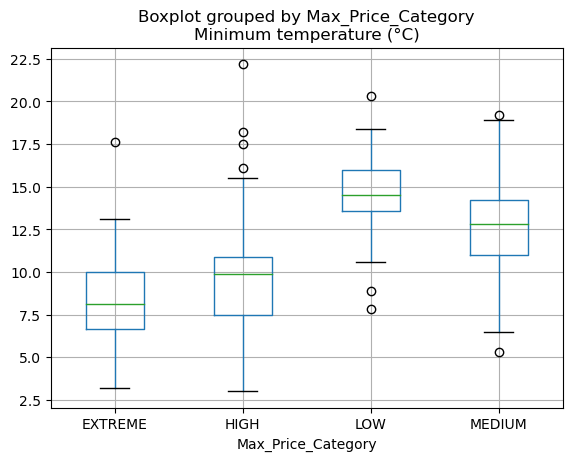

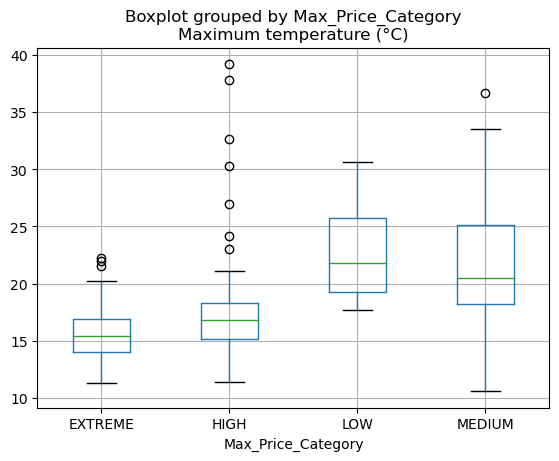

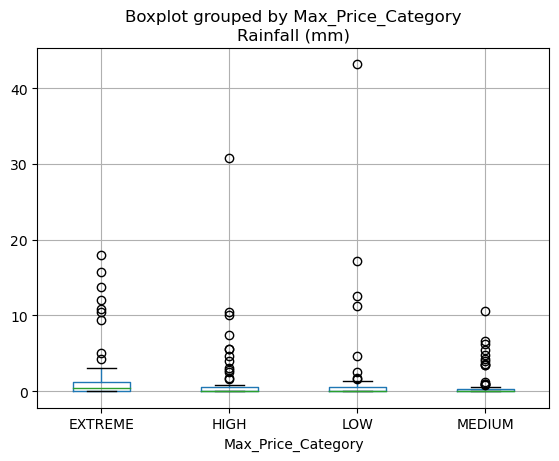

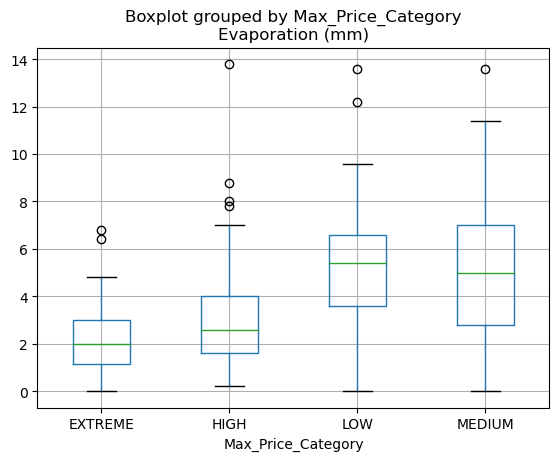

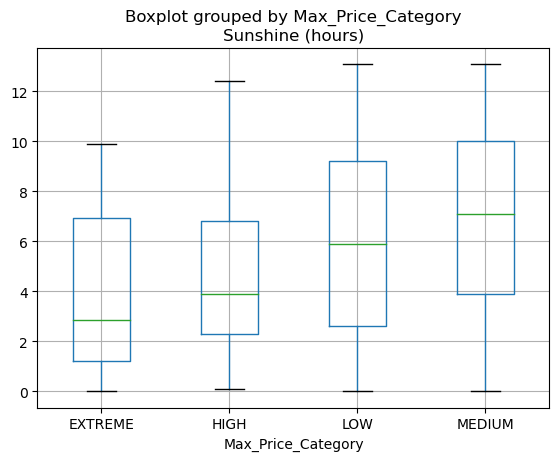

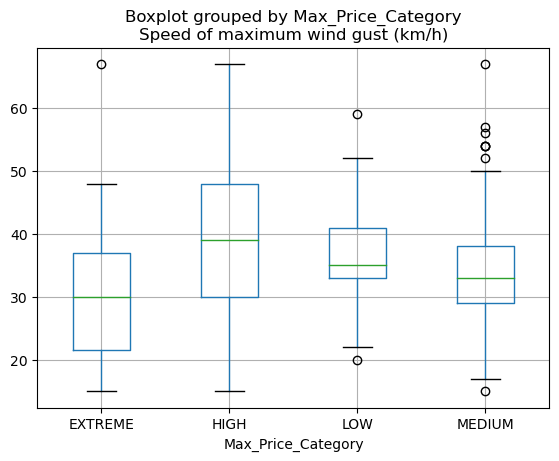

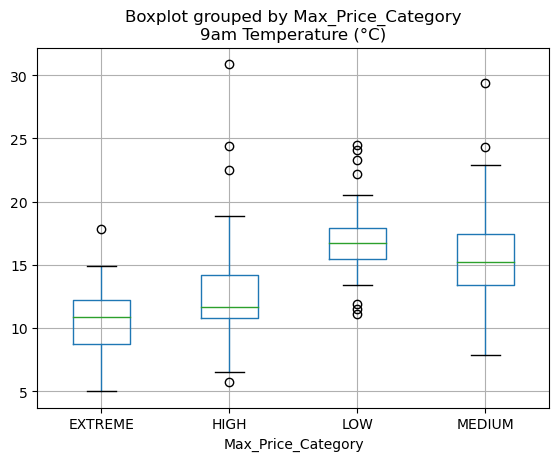

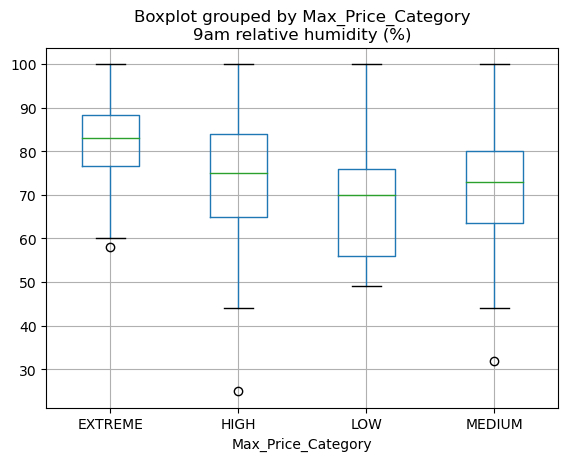

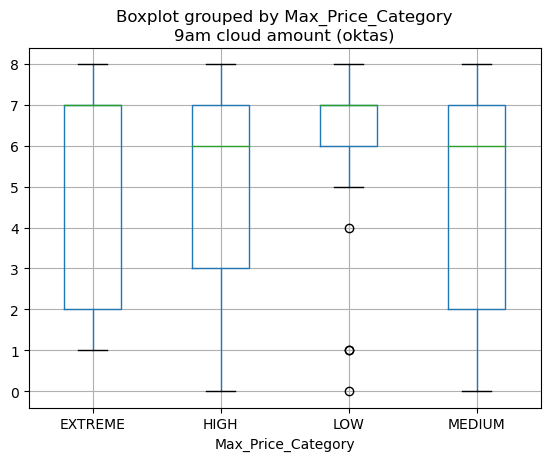

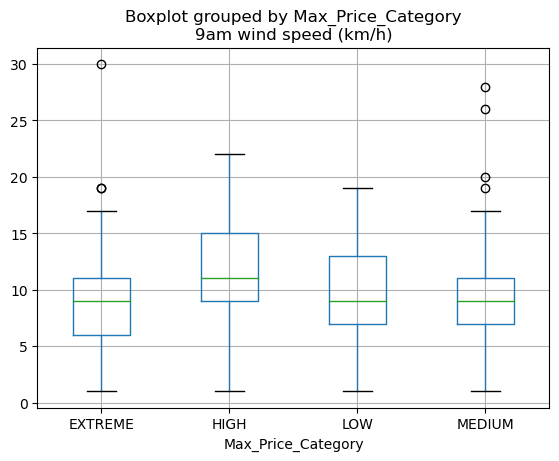

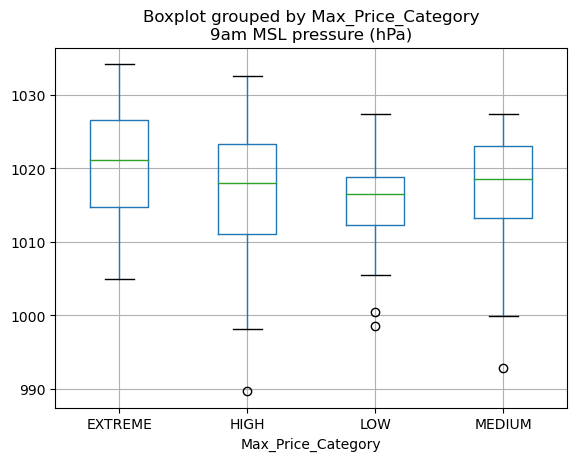

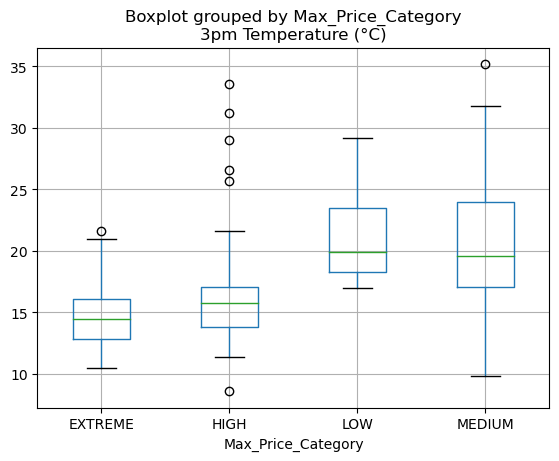

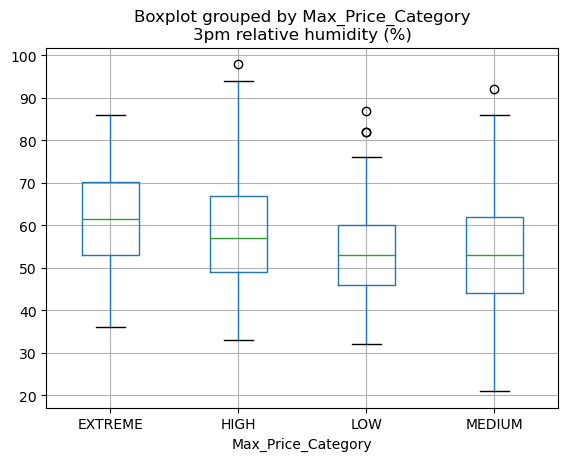

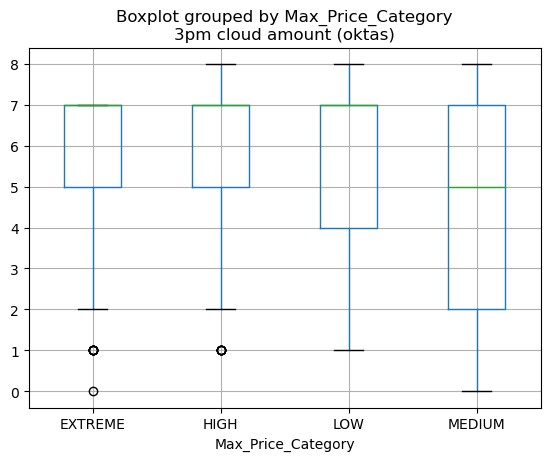

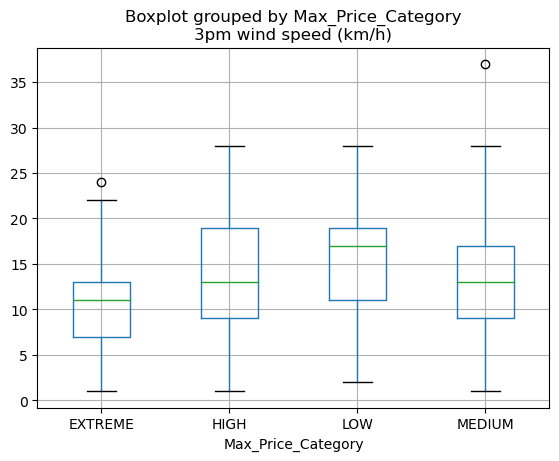

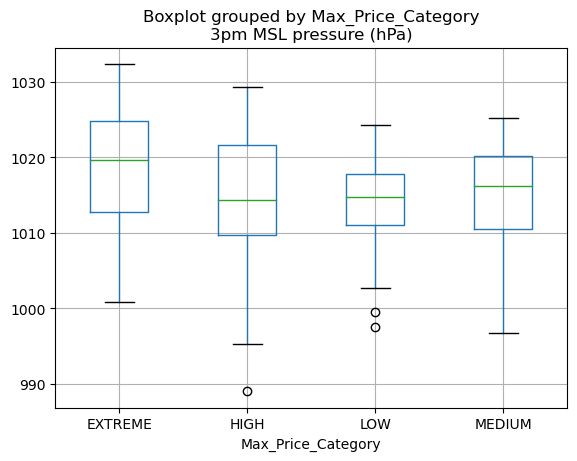

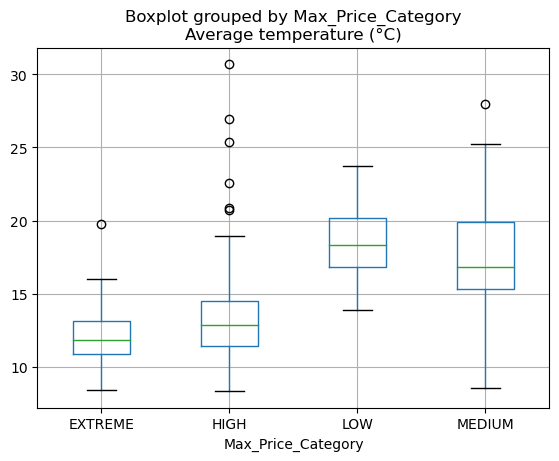

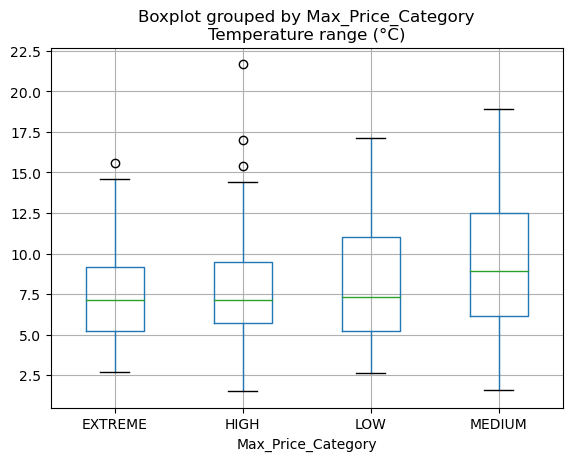

In [13]:
# Now we want to draw boxplot for all numerical columns against Max_Price_Category
for column in result1:
     if result1[column].dtypes == 'float64' or result1[column].dtypes == 'int64' : 
        result1.boxplot(column, by = 'Max_Price_Category')

#### The Boxplots show us different distributions of variables based on each category and by looking at them it looks there are some sort of relations between some variables and price categories.

### To study more we decide to use Anova, we wrote this code before learning chi squared for best feature selection in our course but because we searched a lot to find a way how to find if there is any relation between categorical and numerical, we decide to keep this part

## H0: Mean of variable and price categories are independent 
## H1: Mean of variable and price categories are dependent 
our purpose is to check if mean of temperature in different price categories are same or not and the issue is, we are not checking as a pair. Assume the temperature for price categories 'LOW' and 'MEDIUM' are same but differed with price category 'HIGH', our code will tell that Mean of variable and price categories are dependent but doesn’t show for LOW and MEDIUM are independent.   


In [14]:
# calculate P value based on ANOVA for each variable against maximum price category
import scipy
for column in result1:
    if result1[column].dtypes == 'float64' or result1[column].dtypes == 'int64':

        p_values=scipy.stats.f_oneway(result1[column][result1['Max_Price_Category'] == 'LOW'],
                     result1[column][result1['Max_Price_Category'] == 'MEDIUM'], 
                     result1[column][result1['Max_Price_Category'] == 'HIGH'],
                     result1[column][result1['Max_Price_Category'] == 'EXTREME'])
        print(column,p_values,'\n')

Minimum temperature (°C) F_onewayResult(statistic=43.157745716061086, pvalue=3.2215853333829425e-22) 

Maximum temperature (°C) F_onewayResult(statistic=29.799678894923765, pvalue=2.411656548780436e-16) 

Rainfall (mm) F_onewayResult(statistic=1.416763161884653, pvalue=0.2385680362413236) 

Evaporation (mm) F_onewayResult(statistic=24.59627559157367, pvalue=7.302455004359034e-14) 

Sunshine (hours) F_onewayResult(statistic=9.319796213120343, pvalue=7.636002610266395e-06) 

Speed of maximum wind gust (km/h) F_onewayResult(statistic=7.863573807437506, pvalue=5.086061547900228e-05) 

9am Temperature (°C) F_onewayResult(statistic=35.44846237521846, pvalue=6.549711047196577e-19) 

9am relative humidity (%) F_onewayResult(statistic=9.828204607191164, pvalue=3.958740219051292e-06) 

9am cloud amount (oktas) F_onewayResult(statistic=3.562678600397662, pvalue=0.014948972205136413) 

9am wind speed (km/h) F_onewayResult(statistic=2.1199916376508474, pvalue=0.09840314869100414) 

9am MSL pressure

#### we think that for ANOVA we should consider some assumptions, this is just our thinking and honestly need more time to deeply understand behind the scenes of ANOVA but if we are checking the mean of two variable are different or not, these two variables should have probably same distribution. 

#### Having p values will help us to choose some features for our model, we decide to use 5 features which are independent, the first one is Average temperature, the second one is Evaporation and third one is Humidity and forth is sunshine and last is Speed of maximum wind gust (km/h). Still, some of these variable might be have correlation, for example when temperature is high we can expect higher humidity, we could use scatter plot to check.

In [15]:
# Ignoring futurewarning!!

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 0: Defining Variables and classlable for our model

X = result1[['Average temperature (°C)', 'Evaporation (mm)', '9am relative humidity (%)', 'Sunshine (hours)', 'Speed of maximum wind gust (km/h)']]
classlabel=result['Max_Price_Category']

# Allocate 80 percent of instances for training and rest for testing

X_train, X_test, y_train, y_test = train_test_split(X,classlabel, train_size=0.8, random_state=42)

# Scale data to have same distributions, mean=0 and std = 1

scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Step 1: instantiation, using Knn classification with 5 nearest neighbours

knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# Step 2: fitting traing data

knn.fit(X_train, y_train)

# Step 3: Test our model by testing data

y_pred=knn.predict(X_test)

# Step 4: Evaluation

print(accuracy_score(y_test, y_pred))

0.6041666666666666


### To evaluate our model, we cannot rely just one random state, to solve this we used a for loop and using 100 different random state in range (1,100).
Because we wrote this code before knowing about cross validation, we decide to keep it.


In [16]:
# for loop for different random state 
accuracy = []
for i in range(1,100):
    
    # Allocate 80 percent of instances for training and rest for testing

    X_train, X_test, y_train, y_test = train_test_split(X,classlabel, train_size=0.8, random_state=i)
    
    # Scale data to have same distributions, mean=0 and std = 1

    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    
    # Step 1: instantiation, using Knn classification with 5 nearest neighbours
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    
    # Step 2: fitting traing data
    
    knn.fit(X_train, y_train)
    
    # Step 3: Test our model by testing data
    
    y_pred=knn.predict(X_test)
    
    # Step 4: Evaluation by calculating the average accuracy
    
    accuracy.append(accuracy_score(y_test, y_pred))
print('overall accuracy based on 100 different random_state =', sum(accuracy)/len(accuracy))

overall accuracy based on 100 different random_state = 0.47916666666666635


### overall accuracy is about 48 percent, we think this is not good enough, if we didn't have any model just by probability, we can predict the price category 25 percent correct and by our model 25 percent increased to 48 percent, so sad!

##### This part of code has been written after learning feature selection. Now we use chi squared to find five best features for our model:

In [17]:
from sklearn.feature_selection import SelectKBest , chi2, mutual_info_classif 
from sklearn.model_selection import train_test_split

#Defining Variables and classlable for our model

X= result1. select_dtypes(exclude= object)
classlable = result1['Max_Price_Category']

# Allocate 80 percent of instances for training and rest for testing

X_train, X_test, y_train, y_test = train_test_split(X,classlabel, train_size=0.8, random_state=42)

# instantiation, using Knn classification with 5 nearest neighbours

feature_selection = SelectKBest(chi2, k = 5)

# Perform selection

X_train = feature_selection.fit_transform(X_train, y_train)
X_test = feature_selection.transform(X_test)

In [18]:
# find the name of columns which has been chosen 
feature_selection.get_feature_names_out()

array(['Minimum temperature (°C)', 'Maximum temperature (°C)',
       'Evaporation (mm)', '9am Temperature (°C)',
       'Average temperature (°C)'], dtype=object)

#### We see that in 5 best features 4 features highly correlated, even if we consider them in our model the result won't change a lot, the reason is for example in linear regression if two variables are correlated then using both of them, result in decreasing their coefficient. So, there is no point to use variables which are highly correlated. we change k to find five features which are not correlated:

In [19]:
#Defining Variables and classlable for our model

X= result1. select_dtypes(exclude= object)
classlable = result1['Max_Price_Category']

# Allocate 80 percent of instances for training and rest for testing

X_train, X_test, y_train, y_test = train_test_split(X,classlabel, train_size=0.8, random_state=42)

# instantiation, using Knn classification with 5 nearest neighbours

feature_selection = SelectKBest(chi2, k = 9)

# Perform selection

X_train = feature_selection.fit_transform(X_train, y_train)
X_test = feature_selection.transform(X_test)

In [20]:
feature_selection.get_feature_names_out()

array(['Minimum temperature (°C)', 'Maximum temperature (°C)',
       'Evaporation (mm)', 'Sunshine (hours)',
       'Speed of maximum wind gust (km/h)', '9am Temperature (°C)',
       '9am relative humidity (%)', '3pm Temperature (°C)',
       'Average temperature (°C)'], dtype=object)

##### Because we write our code before knowing feature selection, we used Anova and great news is that these two-method confirmed each other, in both method we find same best features so doesn’t need to find another model based on chi2 study as all the features are same. So, ANOVA and best select features based are chi2 result in same model.

# As we are not satisfied with our model, we will check best features based on mutual information.

In [21]:
X= result1. select_dtypes(exclude= object)
classlable = result1['Max_Price_Category']

# Allocate 80 percent of instances for training and rest for testing

X_train, X_test, y_train, y_test = train_test_split(X,classlabel, train_size=0.8, random_state=42)

# instantiation, using Knn classification with 5 nearest neighbours

feature_selection = SelectKBest(mutual_info_classif, k = 9)

# Perform selection

X_train = feature_selection.fit_transform(X_train, y_train)
X_test = feature_selection.transform(X_test)

In [22]:
feature_selection.get_feature_names_out()

array(['Minimum temperature (°C)', 'Maximum temperature (°C)',
       'Rainfall (mm)', 'Evaporation (mm)', 'Sunshine (hours)',
       '9am Temperature (°C)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', 'Average temperature (°C)'], dtype=object)

### Now we make our new model based on new features, because some of features is highly correlated (temperatures), we just use average temperature and choose other features:

In [23]:
# Step 0: Defining Variables and classlable for our model

X = result1[['Average temperature (°C)', 'Evaporation (mm)', 'Rainfall (mm)', '9am MSL pressure (hPa)', '3pm relative humidity (%)']]
classlabel=result['Max_Price_Category']

# Allocate 80 percent of instances for training and rest for testing

X_train, X_test, y_train, y_test = train_test_split(X,classlabel, train_size=0.8, random_state=42)

# Scale data to have same distributions, mean=0 and std = 1

scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Step 1: instantiation, using Knn classification with 5 nearest neighbours

knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# Step 2: fitting traing data

knn.fit(X_train, y_train)

# Step 3: Test our model by testing data

y_pred=knn.predict(X_test)

# Step 4: Evaluation

print(accuracy_score(y_test, y_pred))

0.3125


#### Checking for different random state 

In [24]:
# for loop for different random state 
accuracy = []
for i in range(1,100):
    
    # Allocate 80 percent of instances for training and rest for testing

    X_train, X_test, y_train, y_test = train_test_split(X,classlabel, train_size=0.8, random_state=i)
    
    # Scale data to have same distributions, mean=0 and std = 1

    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    
    # Step 1: instantiation, using Knn classification with 5 nearest neighbours
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    
    # Step 2: fitting traing data
    
    knn.fit(X_train, y_train)
    
    # Step 3: Test our model by testing data
    
    y_pred=knn.predict(X_test)
    
    # Step 4: Evaluation by calculating the average accuracy
    
    accuracy.append(accuracy_score(y_test, y_pred))
print('overall accuracy based on 100 different random_state =', sum(accuracy)/len(accuracy))

overall accuracy based on 100 different random_state = 0.3665824915824918


# finding best features based on mutual information make our model worse.

In [25]:
# we want to use PCA and cross validation to see if we can improve our model
result_y = result['Max_Price_Category']

In [26]:
result_x = result.select_dtypes(exclude= object) 

In [27]:
result_x

Minimum temperature (°C)  Maximum temperature (°C)  Rainfall (mm)  \
0                        15.6                      29.9            0.0   
1                        18.4                      29.0            0.0   
2                        17.0                      26.2           12.6   
3                        16.0                      18.6            2.6   
4                        15.9                      19.1           11.2   
..                        ...                       ...            ...   
232                       5.5                      12.9            1.2   
233                       4.6                      13.6            0.0   
234                       5.3                      17.8            0.0   
235                       9.1                      16.2            0.6   
236                       6.4                      17.6            4.0   

     Evaporation (mm)  Sunshine (hours)  Speed of maximum wind gust (km/h)  \
0                 2.8               9.3                               31.0   
1                 9.4               1.3                               30.0   
2                 4.8               7.1                               33.0   
3                 3.8               0.0                               41.0   
4                 1.0               0.0                               35.0   
..                ...               ...                                ...   
232               2.4               1.0                               31.0   
233               1.2               3.8                               15.0   
234               1.6               9.6                               39.0   
235               6.4               4.3                               33.0   
236               1.4               7.4                               50.0   

     9am Temperature (°C)  9am relative humidity (%)  \
0                    19.2                       77.0   
1                    23.3                       52.0   
2                    18.3                      100.0   
3                    16.2                       98.0   
4                    17.2                       96.0   
..                    ...                        ...   
232                   9.2                       82.0   
233                   7.7                       88.0   
234                   9.1                       80.0   
235                  10.6                       79.0   
236                  11.1                       70.0   

     9am cloud amount (oktas)  9am wind speed (km/h)  9am MSL pressure (hPa)  \
0                           6                    2.0                  1018.8   
1                           7                   17.0                  1013.3   
2                           8                    4.0                  1007.7   
3                           8                   11.0                  1010.0   
4                           8                   13.0                  1012.5   
..                        ...                    ...                     ...   
232                         7                    1.0                  1022.7   
233                         7                    1.0                  1020.0   
234                         1                    7.0                  1018.6   
235                         7                   13.0                  1011.4   
236                         7                   15.0                  1016.1   

     3pm Temperature (°C)  3pm relative humidity (%)  \
0                    28.1                         43   
1                    28.7                         38   
2                    23.5                         59   
3                    18.2                         82   
4                    18.2                         82   
..                    ...                        ...   
232                  12.2                         55   
233                  12.8                         65   
234                  17.4                

## Now we use PCA to combine variable to 5 groups then using knn to find a model and evaluate our model by cross validation.  

In [28]:
# we need some library for PCA and cross validation

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# split our data to 10 section and by cross validation we will gain more accurate score for our model
k = 10
kf = KFold(n_splits = k, shuffle = True, random_state = 42)
# perform splitting
acc_score = []
acc_score_dt = []
for train_index, test_index in kf.split(result_x):
    X_train, X_test = result_x.iloc[train_index, :], result_x.iloc[test_index, :]
    y_train, y_test = result_y[train_index], result_y[test_index]
    
   # Scale data to have same distributions, mean=0 and std = 1 
    
    scaler = preprocessing.StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    
    # changing all NaNs to mean if there is any in DataFrame
    
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_train = imp.fit_transform(X_train)
    X_test = imp.transform(X_test)
    
    # all variable combined together to achieve 5 groups of variable
    
    pca = PCA(n_components = 5)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    # Step 1: instantiation, using Knn classification with 5 nearest neighbours
    
    knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
    
    # step 2: fitting our data
    
    knn.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    
    # step 3: test our model
    
    y_pred=knn.predict(X_test)
    y_pred_dt = dt.predict(X_test)

    
    # step 4: Evaluation
    
    acc_score.append(accuracy_score(y_test, y_pred))
    acc_score_dt.append(accuracy_score(y_test,y_pred_dt))
    
print('Accuracy of our Knn model is =', sum(acc_score)/k)
print('Accuracy of our dt model is =', sum(acc_score_dt)/k)


Accuracy of our Knn model is = 0.4972826086956522
Accuracy of our dt model is = 0.41775362318840575


# Accuracy of our model based on using PCA and cross validation is about 50 percent, while in our method using ANOVA and a for loop for different random state is about 48 percent which are very close. Using Decision Tree didn’t improve our model, accuracy for Decision Tree is just 42 percent.